In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import Helper_functions as hf

In [2]:
(train_images, train_labels), (validation_images, validation_labels) = tf.keras.datasets.mnist.load_data()
#train_images, train_labels = hf.Imbalance.change_set_statistics(train_images, train_labels, 0.2, 3)
train_labels_onehot = tf.one_hot(train_labels, tf.constant(10))
validation_labels_onehot = tf.one_hot(validation_labels, tf.constant(10))
print(train_labels)
train_images_expanded = np.expand_dims(train_images, axis = 3)
validation_images_expanded = np.expand_dims(validation_images, axis = 3)
train_images_tf = tf.cast(train_images_expanded, dtype = tf.float32) / 255.0
validation_images_tf = tf.cast(validation_images_expanded, dtype = tf.float32) / 255.0

[5 0 4 ... 5 6 8]


In [3]:
baseline = tf.keras.models.load_model('checkpoints/baseline.hdf5')

In [4]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 2744)              0         
_________________________________________________________________
dense (Dense)                (None, 56)                1

In [5]:
masks = hf.Adversarial.create_adversarial_masks(validation_images_tf, 
                                                validation_labels, 
                                                tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                                                baseline)

In [16]:
np.sum(masks == 0)

0

In [6]:
preds = baseline(validation_images_tf)
for i in range(preds.shape[0]):
    print(i)
    print(preds[i])

0
tf.Tensor(
[ -0.7969558   -1.0598452    3.8143213    6.628909    -7.063051
  -6.0396905  -19.844606    21.284971    -0.21971685   4.0894666 ], shape=(10,), dtype=float32)
1
tf.Tensor(
[  5.692059    9.244086   31.558567   -5.351882  -11.832736  -17.240793
   2.7884212  -6.517847   -2.674881   -5.7642016], shape=(10,), dtype=float32)
2
tf.Tensor(
[ 0.4737767  13.691307    2.3363068  -7.8664618   1.5812756  -5.840796
  1.025061    2.2300594  -0.04670437 -5.290221  ], shape=(10,), dtype=float32)
3
tf.Tensor(
[ 19.382925  -10.87055     1.8036199  -5.8179097  -1.9026767  -3.9249132
   8.849967    0.8780901  -2.793086    1.6698344], shape=(10,), dtype=float32)
4
tf.Tensor(
[-3.3881662  -4.383847   -0.90163004 -5.928292   19.041058   -8.567913
 -3.6024966  -1.2591541  -0.04160838  4.774742  ], shape=(10,), dtype=float32)
5
tf.Tensor(
[-0.04356034 17.053041    2.33936    -8.60869     0.92264193 -8.354651
 -2.2614083   5.5591054   0.74510086 -3.0790966 ], shape=(10,), dtype=float32)
6
tf.Tens

tf.Tensor(
[ -3.6709352   -8.689926   -10.264306     4.3338704   -1.2098316
  20.470034    -0.08900999 -10.6468935   14.753518    10.757552  ], shape=(10,), dtype=float32)
348
tf.Tensor(
[-0.61672306 13.686536    1.8842129  -7.113273   -0.30491048 -4.9394426
  2.680346    1.09293     3.372475   -5.2815394 ], shape=(10,), dtype=float32)
349
tf.Tensor(
[ -6.514179    -0.42981333   7.431128    20.906267   -15.513214
  -2.8819702  -20.3903       7.4223557    6.3967304    0.98042107], shape=(10,), dtype=float32)
350
tf.Tensor(
[ -8.326981   15.081006   -3.6292927   1.0964234   3.5597463  -1.5224061
 -10.177821    3.9111404   3.4892642   0.7795133], shape=(10,), dtype=float32)
351
tf.Tensor(
[ -5.9770885  -5.7175326  -6.027951    8.038414  -17.799627   28.801146
   7.1197367  -4.431714    7.161617    8.996592 ], shape=(10,), dtype=float32)
352
tf.Tensor(
[  2.0779157  -6.85806   -10.359961   13.084229  -11.538558   20.538254
  -3.6081898  -3.4655252   1.4914106   1.953576 ], shape=(10,), dty

tf.Tensor(
[  0.23425794   5.8863397   10.401167     5.9477015  -12.623022
 -11.52662    -19.345154    18.701225     1.0265385    4.2051325 ], shape=(10,), dtype=float32)
680
tf.Tensor(
[ -0.7317737   -3.4152834   -0.31034115 -14.880757     3.107228
   0.6591156   28.273033   -15.204478     1.1943257   -9.02834   ], shape=(10,), dtype=float32)
681
tf.Tensor(
[ -8.241472   -12.77784     -1.0924282    4.763258    11.516917
   0.16721165 -23.056868     7.977925     1.8696811   23.324743  ], shape=(10,), dtype=float32)
682
tf.Tensor(
[-4.3818436  14.880174   -0.47694412 -2.5006077   2.6021364  -4.1322584
 -0.5081596   0.8995497   1.0345676  -2.758437  ], shape=(10,), dtype=float32)
683
tf.Tensor(
[-4.959395   -0.37422755 -0.3247953  17.45956    -7.8787675   5.392444
 -6.6551313  -9.146142    4.081389    2.00236   ], shape=(10,), dtype=float32)
684
tf.Tensor(
[-14.887855    7.2980895  16.007795   13.308377   -3.0414958 -15.892625
 -23.570501   14.871012   -1.7666005   0.9849135], shape=(10,

tf.Tensor(
[-12.200908    2.4867163   6.0825033   8.616877    3.3731654  -4.322812
 -18.058054   15.640575   -2.1976082   5.663631 ], shape=(10,), dtype=float32)
1013
tf.Tensor(
[ -6.6548343   -2.0048387    0.03448401   5.1537776    9.220173
  -4.8625875  -14.578917     1.7062107   -3.0062606   18.97514   ], shape=(10,), dtype=float32)
1014
tf.Tensor(
[  8.961583    -6.8180227   -0.72772706   3.3918757   -4.920376
   6.423065     7.488216   -11.889395     6.2300997    3.7470744 ], shape=(10,), dtype=float32)
1015
tf.Tensor(
[ -8.188696     0.26568517  -2.4305348   -4.222181    18.007822
  -3.244931   -10.926475    -0.7039583    4.39291      6.3040204 ], shape=(10,), dtype=float32)
1016
tf.Tensor(
[ -3.3802204    6.5639997   24.821802     3.6096992   -3.9028397
 -10.533162   -12.062412     2.8551636   -0.05139051  -4.963379  ], shape=(10,), dtype=float32)
1017
tf.Tensor(
[ -2.2502468  -1.0947261  -0.7810298 -15.734256   -3.0156522   3.3016636
  21.847174  -11.865646    4.639455   -5.838

tf.Tensor(
[ 3.497905  -0.9811977 14.349064  -1.6009583 -4.2255826 -8.762135
 -5.2949543 -1.6376573  7.5006895 -1.9452171], shape=(10,), dtype=float32)
1357
tf.Tensor(
[-2.4195093e-01 -4.0038838e+00  1.0533242e-02 -5.4821119e+00
  1.4847963e+01 -4.0114141e+00 -4.3591509e+00 -9.3310200e-02
 -2.1409891e+00  3.5486248e+00], shape=(10,), dtype=float32)
1358
tf.Tensor(
[-2.4234655 14.411678   1.9866178  0.715853  -0.2820676 -7.50966
 -2.9249256  3.0677938  0.899944  -3.3133807], shape=(10,), dtype=float32)
1359
tf.Tensor(
[  1.4495004   3.6000483   8.625313    4.584534   -9.670252  -10.159657
 -21.49071    22.093561   -1.8180887   4.92409  ], shape=(10,), dtype=float32)
1360
tf.Tensor(
[-5.4974365 14.076532  -1.3836865 -0.6955948  2.7330358 -3.1490161
 -4.444069   3.4321997  1.2708167 -1.1165001], shape=(10,), dtype=float32)
1361
tf.Tensor(
[ -2.0126846   6.3918624   2.8578646   5.0855536  -9.110695   -6.535474
 -20.885883   20.7538      1.4325755   4.9902396], shape=(10,), dtype=float32)
1

tf.Tensor(
[ 26.273085   -11.572302     0.95882404  -1.1196822  -17.84995
   0.5040823    3.6565406   -0.8259349    5.7943683    0.7729365 ], shape=(10,), dtype=float32)
1701
tf.Tensor(
[-10.130625    1.1552473  -1.6224717  -3.8082252  14.384462    0.1608518
  -5.4488854   1.0962011  -0.7561928   5.5799603], shape=(10,), dtype=float32)
1702
tf.Tensor(
[-8.0003999e-02  1.2871592e+00 -1.5401941e-02  3.0695846e+00
 -2.0836758e+01  7.3284974e+00  2.6039205e+00 -2.2555473e+00
  2.2769367e+01 -7.8384438e+00], shape=(10,), dtype=float32)
1703
tf.Tensor(
[ -0.90230924   5.3480735    5.6973476    4.8677945   -8.735725
  -5.0151744  -15.606157    16.557234    -0.36216792   4.8423615 ], shape=(10,), dtype=float32)
1704
tf.Tensor(
[-2.2990873  13.477965   -0.44376487 -4.3182807   0.69942015 -4.0058165
 -3.5072076   2.8665123   3.0264943   0.8105211 ], shape=(10,), dtype=float32)
1705
tf.Tensor(
[ -2.9647737   4.5852532   6.178372    1.8369617  -3.005115   -7.695178
 -19.540148   18.987236   -1.925

tf.Tensor(
[  6.049685   -4.4634786  27.236067    5.1848745 -25.635103  -16.929499
 -10.656827   15.351403    7.7924175   3.4040055], shape=(10,), dtype=float32)
2045
tf.Tensor(
[-12.936061    3.3004591  -6.066573   33.036373  -15.498929   12.271159
 -19.01753    -2.1125283   8.457658    2.7466385], shape=(10,), dtype=float32)
2046
tf.Tensor(
[-12.261179    -2.548056    -1.5560474   -5.4505024   22.753984
  -2.4394882   -8.764501    -0.85185164   1.864178     5.2275558 ], shape=(10,), dtype=float32)
2047
tf.Tensor(
[  8.254315    -4.998206    -0.50053805  -5.1021457   -3.594447
   7.3684926   25.094643   -10.986144    -0.18157439   1.0508853 ], shape=(10,), dtype=float32)
2048
tf.Tensor(
[-10.292933     1.8404404    1.3956736   -0.44739172   5.8430963
  -3.4766994  -23.153255    18.94092     -6.1816573   11.921468  ], shape=(10,), dtype=float32)
2049
tf.Tensor(
[-6.7664795  -2.386324    2.2130682  -0.02015659  7.635089   -4.6560316
 -7.1699777  -1.7864661   1.4876862  14.223954  ], sha

tf.Tensor(
[  1.0160094   -5.6330714   -1.5009342   -0.89492935  -4.0381584
   4.1533484   20.009409   -13.804444     5.022039    -9.325171  ], shape=(10,), dtype=float32)
2389
tf.Tensor(
[ -6.1127353   -2.6686368    5.6568074    4.3487244  -10.42134
  -0.79801947  -4.4847364   -6.4860787   23.981066     0.66722864], shape=(10,), dtype=float32)
2390
tf.Tensor(
[ -1.8604618  15.465944   35.006718    7.376536  -24.84704   -26.424492
 -14.4033375  10.024917    5.1984468  -5.1840734], shape=(10,), dtype=float32)
2391
tf.Tensor(
[ -7.9401717  11.156643   26.710365    2.4759243  -8.112322  -10.499862
  -1.5371517   2.6381302   2.7968984 -11.909357 ], shape=(10,), dtype=float32)
2392
tf.Tensor(
[  2.9031115   -4.0624876    4.8139944   18.546934   -14.748093
  -3.3105016  -13.953183     0.96411896   0.37144148   3.4505239 ], shape=(10,), dtype=float32)
2393
tf.Tensor(
[ -4.115319    -6.8043494    0.21465841   9.775034    -6.7029586
   5.665074     1.5869031  -13.877468    19.137419     3.24865

tf.Tensor(
[  9.402927    0.7881474  -8.076774  -12.016684    3.8390415  -4.538413
  30.121279   -4.244615    3.7876177  -9.698259 ], shape=(10,), dtype=float32)
2729
tf.Tensor(
[ -8.503634   11.309758   32.69125     4.9103193  -8.206173  -18.28587
  -8.029988    8.702985   -1.3153043 -12.908369 ], shape=(10,), dtype=float32)
2730
tf.Tensor(
[-12.869623   10.523919    6.5772934   3.1755416  11.205398   -8.201859
 -18.148542   21.659988   -2.153694   -1.9626713], shape=(10,), dtype=float32)
2731
tf.Tensor(
[ -6.8957586   -1.0380926   -0.09046303  21.38116     -5.085096
   7.193672   -14.650222    -3.2382865   -1.1649104    2.198711  ], shape=(10,), dtype=float32)
2732
tf.Tensor(
[-2.9243534 -1.778731  -0.8487667 -6.8388762  4.7683687  2.895494
 13.674357  -8.540085   1.1935798 -7.4462566], shape=(10,), dtype=float32)
2733
tf.Tensor(
[ 22.066267    -0.42660314   6.9883347  -11.1063595   -9.9866085
  -5.4951334    1.644637     3.0732942    0.16448197  -2.8979087 ], shape=(10,), dtype=floa

tf.Tensor(
[-4.5663371e+00  2.1477020e+00  9.1943445e+00  4.2722764e+00
 -1.6552130e+01 -2.2855151e+00 -8.2510538e+00  6.5292364e-01
  2.0117733e+01  1.0492479e-02], shape=(10,), dtype=float32)
3069
tf.Tensor(
[  6.4592643 -13.587845    3.814076  -12.046393   21.634531   -5.3463407
   2.6366444  -9.705937   -0.7194789   7.217746 ], shape=(10,), dtype=float32)
3070
tf.Tensor(
[-5.1451187  15.638753    0.12736201 -3.2485278   2.335823   -4.8484225
 -4.765646    4.3894734   0.6714734   0.6552313 ], shape=(10,), dtype=float32)
3071
tf.Tensor(
[ -0.16427672   0.5631944   32.417927     1.6276494   -1.800697
 -18.383303    -4.797639     4.003911    -2.782836   -13.121776  ], shape=(10,), dtype=float32)
3072
tf.Tensor(
[ -5.7856693   -2.1160383    2.8876855    2.5260851  -14.683067
   3.7120209   -5.7975283   -2.473334    25.889734     0.42774898], shape=(10,), dtype=float32)
3073
tf.Tensor(
[ -1.5674232  10.901962   19.398363    5.8265467   1.4522877  -8.691914
 -17.073334   11.497575   -5.51

tf.Tensor(
[ -7.068805   -1.6144125   6.960922   28.197708  -16.13087     3.059241
 -14.413008   -6.045125    5.3969746  -1.9649707], shape=(10,), dtype=float32)
3410
tf.Tensor(
[-5.093982   -3.1190193  -2.8437655  -4.7845783  17.831758   -5.487842
 -4.0113072  -1.2336289  -0.53369194  5.712306  ], shape=(10,), dtype=float32)
3411
tf.Tensor(
[ -8.173121  -10.016964   -2.8916442   1.016358    7.440304    1.0754936
 -16.538715    8.5747795   6.4134355  21.360533 ], shape=(10,), dtype=float32)
3412
tf.Tensor(
[18.491953  -7.9210095  6.6231422 -5.7794847 -9.605435  -8.509359
 -1.9671528  0.3890115  5.1360745  7.5337505], shape=(10,), dtype=float32)
3413
tf.Tensor(
[ 22.834501    -0.7547403    7.081256   -11.377576    -6.5814915
  -7.633397     8.377004    -1.8174162   -0.12276644  -3.970289  ], shape=(10,), dtype=float32)
3414
tf.Tensor(
[ -8.142459    3.1521668  -5.2797766  14.83325   -25.149443   21.121918
   0.7019818 -11.393744   13.686692    4.949073 ], shape=(10,), dtype=float32)
341

tf.Tensor(
[-5.3341084   5.8919597   8.07378     0.79300904 -0.27733952 -7.028353
 -8.9827175  12.21754    -0.24550056 -5.412666  ], shape=(10,), dtype=float32)
3752
tf.Tensor(
[  1.4975454   -4.0557117   -0.26539528 -13.258826    27.200167
 -10.836504     3.2202096    0.6094936   -4.2389717    1.7464682 ], shape=(10,), dtype=float32)
3753
tf.Tensor(
[ -0.74772024   6.7759233    5.10746      3.2994492   -9.72895
  -7.6476903  -18.448952    22.501072     1.9317377    5.385621  ], shape=(10,), dtype=float32)
3754
tf.Tensor(
[-5.285822  -4.6513715 -6.4004335  7.4128575 -5.858539  19.616423
  2.7510152 -5.8962383  1.4495405  8.5257   ], shape=(10,), dtype=float32)
3755
tf.Tensor(
[-2.5636446  -8.389076    5.7723413   0.02871264  2.7824996  -5.797298
 -2.981364   -1.605934    8.07147    16.614185  ], shape=(10,), dtype=float32)
3756
tf.Tensor(
[-2.187611  -7.555789  -4.357798   4.820277  -9.558067  16.209843
 -1.6888784 -7.797056   7.096963  12.136832 ], shape=(10,), dtype=float32)
3757
tf.

tf.Tensor(
[ 23.064024  -13.0548935   1.4222003  -1.6329912   2.154499   -3.20581
   4.7170362  -2.9921837  -3.957125    6.35241  ], shape=(10,), dtype=float32)
4092
tf.Tensor(
[  4.560153    3.7099519   0.9786856  -3.629126  -13.291038    1.5702351
   5.637978   -7.696145   18.864985   -6.0717626], shape=(10,), dtype=float32)
4093
tf.Tensor(
[-3.0532029 -2.2902663 -2.1661446  4.408088   7.563729  -6.3737397
 -9.798283   6.123834  -4.8093414 16.378643 ], shape=(10,), dtype=float32)
4094
tf.Tensor(
[-7.0215774 -6.7915707 -4.6581173  4.1572156 -2.0998685 17.26583
  1.7375927 -3.904574   5.939367   5.213627 ], shape=(10,), dtype=float32)
4095
tf.Tensor(
[ -7.988737   -8.028135    0.5313042   3.7948236   7.7578154  -1.7530131
 -20.383259    2.7417881   3.252811   23.0912   ], shape=(10,), dtype=float32)
4096
tf.Tensor(
[-8.336664   -7.761956    3.086641    3.6510935  -2.6064487   0.7554315
 -0.74411446 -8.889129   17.044994    3.5348237 ], shape=(10,), dtype=float32)
4097
tf.Tensor(
[ -8.4

tf.Tensor(
[-1.1034959e+01  3.5550644e+00  6.8403035e-03  2.8747585e+01
 -1.4985820e+01  3.7721241e+00 -1.2620775e+01 -2.5056474e+00
  5.9856324e+00  1.9059575e+00], shape=(10,), dtype=float32)
4431
tf.Tensor(
[-11.78294      1.5714394   -2.3118923   -3.6572053   21.13977
  -3.6617577  -10.346489     0.37836486   1.0855074    4.9831376 ], shape=(10,), dtype=float32)
4432
tf.Tensor(
[18.047033  -6.417252   2.8375275 -4.230105  -5.4461446 -3.81172
  4.1693645 -4.98494   -0.5536438  2.383647 ], shape=(10,), dtype=float32)
4433
tf.Tensor(
[-17.817995    8.319531   13.482607    8.042108    3.1272626 -13.093787
 -19.698324   20.086126   -4.3408427  -8.184248 ], shape=(10,), dtype=float32)
4434
tf.Tensor(
[ -5.1631255   -0.37743098   4.367297    10.007306   -16.49381
  -2.438908    -6.2188826   -1.332253    23.085323    -1.2735327 ], shape=(10,), dtype=float32)
4435
tf.Tensor(
[ -8.509293     2.3788173    1.7393934   18.591953    -9.201809
  -3.0053785  -18.739613     9.442142     2.3239338  

tf.Tensor(
[  4.607647    7.420187   32.50358    -2.1485648  -3.9416268 -18.295841
   2.1660416  -1.4849346  -6.848723  -12.72195  ], shape=(10,), dtype=float32)
4776
tf.Tensor(
[ 18.83642   -18.26435    -1.6375825  -2.1784737  -5.4940395   0.530016
   9.252923    1.1374102   2.1602309   5.554282 ], shape=(10,), dtype=float32)
4777
tf.Tensor(
[ 0.24736726  3.3305628  -3.8629553  -2.100342   -4.6917377   2.4485297
  2.8138285  -4.586841   12.619922   -0.10974775], shape=(10,), dtype=float32)
4778
tf.Tensor(
[-6.8825073  15.442434   -2.3285077  -1.374655    0.84618884 -1.995683
 -7.8747      4.3597426   1.807102   -0.55589753], shape=(10,), dtype=float32)
4779
tf.Tensor(
[  6.557727    -1.8102299   -7.8612585  -10.428395    -0.6361198
   0.11147348  29.26392    -11.5427       2.7272124   -7.086654  ], shape=(10,), dtype=float32)
4780
tf.Tensor(
[ 23.366024    -4.5509377    5.304473   -11.418396    -7.1677756
  -6.781196     7.0236006   -2.6006982    0.96816534   0.83926845], shape=(10,),

tf.Tensor(
[-13.339977   10.983916   28.26412    10.587717  -15.313949   -9.058193
 -12.707018    5.9269648   5.6824756  -5.8449745], shape=(10,), dtype=float32)
5120
tf.Tensor(
[-6.368298   5.4927483 23.83266    4.0901384 -8.144752  -6.3536944
 -8.606678   4.364941   4.171032  -9.351296 ], shape=(10,), dtype=float32)
5121
tf.Tensor(
[ -2.8764923   8.482252    2.0036385   1.8944887   1.9623616  -7.8479166
 -14.271317   17.43631    -4.642011    7.05136  ], shape=(10,), dtype=float32)
5122
tf.Tensor(
[ -0.21578056   3.5048316    8.922292     3.5761223   -1.6599417
  -9.860692   -20.029043    19.512627    -5.5915103   10.17753   ], shape=(10,), dtype=float32)
5123
tf.Tensor(
[ -5.9294534  -1.7048305   1.8398516  -9.684267   25.267027  -11.291813
  -3.2507145   5.2951427  -1.149505   -1.979689 ], shape=(10,), dtype=float32)
5124
tf.Tensor(
[ 26.254507  -11.693974    7.556249  -10.553578   -2.7529728  -6.1418676
   7.4432282   0.3660863  -2.5653927   4.343463 ], shape=(10,), dtype=float32)


tf.Tensor(
[25.720028   -8.750183    0.6070242  -7.6172557  -5.196928    0.5850743
 10.09105    -2.0384793  -3.3302515  -0.37519932], shape=(10,), dtype=float32)
5464
tf.Tensor(
[ -6.7995424  -2.8940265   2.7601867  -9.474476   26.07201   -14.065025
  -3.998842    7.0150905  -1.6549995  -0.3603735], shape=(10,), dtype=float32)
5465
tf.Tensor(
[ -3.5994546   -0.19702876   2.267412     5.260377    -1.6941035
  -6.60119    -25.287724    25.966234    -3.0127633    3.765513  ], shape=(10,), dtype=float32)
5466
tf.Tensor(
[ -1.6512125   -0.20109862   5.907752     4.5303087   -4.059048
  -6.761865   -22.436419    23.11144     -3.1255662    7.9957967 ], shape=(10,), dtype=float32)
5467
tf.Tensor(
[ 3.1934285e+00 -2.9048779e+00 -4.1189170e+00 -9.9790430e+00
  3.9546096e+00 -2.5999129e-02  2.9083078e+01 -1.1448085e+01
  1.4296218e+00 -1.0924303e+01], shape=(10,), dtype=float32)
5468
tf.Tensor(
[-10.15112      0.87489367   0.3511244   28.06647    -10.88493
   9.823797   -10.894892    -4.9116364  

tf.Tensor(
[-13.294593   16.25493    36.30894    11.338805  -16.039051  -23.086252
 -21.171724   19.8876      3.290169  -11.2124405], shape=(10,), dtype=float32)
5800
tf.Tensor(
[  0.11807881 -13.011652    -1.0328172    3.746612     4.5807295
  -3.7468383  -10.701217     7.224845     1.764892    19.19188   ], shape=(10,), dtype=float32)
5801
tf.Tensor(
[ 11.549836    -6.1539617   -2.3096645   -2.847436     0.49288145
  -1.9144981   21.104227   -11.313846     5.3646092   -8.639505  ], shape=(10,), dtype=float32)
5802
tf.Tensor(
[ -0.40914226  -9.502401     0.7912256   10.355039   -17.007711
  18.883627    -0.61007065 -14.372183     8.442203    15.444614  ], shape=(10,), dtype=float32)
5803
tf.Tensor(
[-1.6556913e+01 -3.4002445e+00  5.5636129e+00  6.9895731e-03
 -7.5972600e+00  6.9984503e+00  4.2479753e+00 -8.0806360e+00
  2.1549622e+01 -9.1169901e+00], shape=(10,), dtype=float32)
5804
tf.Tensor(
[ -4.6080728   -2.402295     0.09216743  30.080734   -14.7659025
   3.5057256  -22.310438   

tf.Tensor(
[  1.6830009 -13.514232    9.40732     3.0806189 -11.4331665  -3.510775
   9.899915  -14.986034   21.38109     6.535255 ], shape=(10,), dtype=float32)
6138
tf.Tensor(
[ -9.792575   -2.3486075   1.0165697 -10.317208   28.81207   -11.323341
  -5.5661864   4.6964903  -1.7543824  -0.5792713], shape=(10,), dtype=float32)
6139
tf.Tensor(
[-10.983801    8.340643    4.3937216  28.420101  -15.279201    4.9266577
 -17.898176    3.9902112   5.8417697  -5.7558665], shape=(10,), dtype=float32)
6140
tf.Tensor(
[ 24.3705    -13.350578   -4.370023   -3.096657   -7.210038    3.185531
  11.774539   -0.7181936   0.5349745   1.8738501], shape=(10,), dtype=float32)
6141
tf.Tensor(
[-0.559471  17.425856   1.9159678 -4.569834  -2.3452022 -7.4857516
 -2.5059247  4.678597   2.918759  -2.7531292], shape=(10,), dtype=float32)
6142
tf.Tensor(
[  0.04904738  -9.087198   -10.101589     4.182509    -0.33852372
  20.771976     4.449622   -10.1146555    7.6182585    2.2450788 ], shape=(10,), dtype=float32)


tf.Tensor(
[23.590929  -7.5113344  4.2748804 -6.231365  -4.010476  -4.1573353
  3.5209463 -4.6122003 -2.9278886  3.293577 ], shape=(10,), dtype=float32)
6479
tf.Tensor(
[  1.1509396  -7.079754   -1.6400548  -2.8667204  -2.8376622   4.377228
  24.862787  -16.92291     3.9077578  -7.2776055], shape=(10,), dtype=float32)
6480
tf.Tensor(
[  2.9102983   4.9424596  21.232948   -4.027387   -3.260523  -14.679818
  -1.9066054   4.895933   -4.188138  -11.655128 ], shape=(10,), dtype=float32)
6481
tf.Tensor(
[ -9.637977   -1.4769169   2.8726556  26.247925  -15.685641    5.3181543
 -16.237282   -7.9527383   9.010742    1.6454401], shape=(10,), dtype=float32)
6482
tf.Tensor(
[ 0.1471222  17.657408    1.6053587  -9.777244    1.7923788  -6.3197536
 -0.40374455  3.0269442   1.2650557  -4.896178  ], shape=(10,), dtype=float32)
6483
tf.Tensor(
[ -1.8158878   -4.695997   -13.042259     4.889049    -0.73337275
  25.468264     5.240319    -8.09116      2.831464     8.224454  ], shape=(10,), dtype=float32)


tf.Tensor(
[ -5.38684    14.232926   36.08381     5.281614  -14.17781   -20.740765
 -17.222261    5.374531   -0.9951429  -5.4614363], shape=(10,), dtype=float32)
6821
tf.Tensor(
[-3.2939496e+00  2.6350183e+00  5.3233666e+00  2.3674421e+01
 -1.3426222e+01 -3.2297063e-01 -8.6993551e+00 -5.2762566e+00
  1.3602931e-02 -1.6840161e+00], shape=(10,), dtype=float32)
6822
tf.Tensor(
[-10.535017    -2.5942953    0.9123149   -9.515537    28.430975
  -7.679555    -9.796577     3.91242     -2.0780706   -0.03276156], shape=(10,), dtype=float32)
6823
tf.Tensor(
[-7.2166734 -1.9145455 -9.241983  12.466714  -7.311529  25.29421
  0.3359348 -8.093725   3.2592745  6.901046 ], shape=(10,), dtype=float32)
6824
tf.Tensor(
[  2.5059261  -3.8152452  -2.8773043  -9.241993    0.6465922   0.6922804
  27.270388  -14.231301    2.9187174 -10.025967 ], shape=(10,), dtype=float32)
6825
tf.Tensor(
[ -2.1919935    4.7798414    6.927436     4.616851    -7.277562
  -8.275399   -21.948544    20.918875     0.15880987   7.05

tf.Tensor(
[ 19.540745    -0.4950002    8.197786   -10.104583    -1.033937
  -9.252528     8.310458    -2.7343106   -4.313191    -0.03990176], shape=(10,), dtype=float32)
7162
tf.Tensor(
[17.736343   2.3967397  6.8709297 -5.615464  -3.3296268 -8.591202
  5.433649  -3.2760365 -1.1500055 -4.103653 ], shape=(10,), dtype=float32)
7163
tf.Tensor(
[ -1.918434     6.076996    34.947754    -0.36764005  -1.5856892
 -19.625021   -14.339386    13.744442    -5.135251    -7.612205  ], shape=(10,), dtype=float32)
7164
tf.Tensor(
[-2.9925182  -2.7551124   0.20402569 -0.8996409  -4.5902576   1.7174537
 -6.8832417  -0.45305592 21.490416    0.37360358], shape=(10,), dtype=float32)
7165
tf.Tensor(
[  0.57446134  18.76424      3.2874908  -10.306868     2.5823052
  -9.425785     0.96316713   4.5318227    0.23189059  -5.5311084 ], shape=(10,), dtype=float32)
7166
tf.Tensor(
[  2.1109135  -3.0270286  -1.7051084  -8.790823    5.091669    2.0412693
  25.952131  -11.620107   -3.9550588  -4.810068 ], shape=(10,)

tf.Tensor(
[ -1.3895888   6.178236   13.475011    8.562856  -16.374731  -11.55837
 -17.32422    24.72146     1.339083    4.9719253], shape=(10,), dtype=float32)
7505
tf.Tensor(
[14.761796  -4.108105   3.9071827 -8.238122   8.238426  -9.644013
 12.856219  -3.9518132  2.4245327 -3.9110847], shape=(10,), dtype=float32)
7506
tf.Tensor(
[22.355143  -6.2637134  3.06402   -9.105279  -2.1799378 -5.6470118
  8.332302  -1.8820864 -2.6009111 -1.8957387], shape=(10,), dtype=float32)
7507
tf.Tensor(
[-0.88754296 15.4365835   4.1944246  -9.197369    3.516709   -7.6924877
  2.2023067   1.5285825  -0.15726161 -7.5350456 ], shape=(10,), dtype=float32)
7508
tf.Tensor(
[ -7.5090904   12.239171    33.05686     -1.8103637  -10.968619
  -8.149779    -3.1345227    0.48958278   0.85636574  -5.287822  ], shape=(10,), dtype=float32)
7509
tf.Tensor(
[ -8.732746     0.19648755  -0.21313784  25.876764   -12.384327
   8.552511   -17.862423    -6.2667246    7.4202437    3.3524866 ], shape=(10,), dtype=float32)
7510


tf.Tensor(
[-3.2846467  3.3631902 22.041117   4.600675   0.9153879 -9.751141
 -7.282869  -2.3026602 -2.2362707 -6.3678365], shape=(10,), dtype=float32)
7841
tf.Tensor(
[ -4.062256    -5.2487817    0.63368195  19.326227    -2.8671308
   4.3766007  -19.545769    -7.11478      5.3530574    8.740008  ], shape=(10,), dtype=float32)
7842
tf.Tensor(
[ 0.40373182 -5.3048635  -6.983501    3.6766965  -1.2915518  10.10239
  3.9223585  -9.66885    10.268634   -4.905188  ], shape=(10,), dtype=float32)
7843
tf.Tensor(
[ 5.405829   -1.9469645   0.14594164 -9.495444    3.608375   -5.2284513
 25.938633   -7.6470118   0.11863396 -8.277624  ], shape=(10,), dtype=float32)
7844
tf.Tensor(
[ 1.5825222 -2.0984323 -8.163404  -1.4640521 -6.807616  -2.2964146
 -9.33254   21.215685   1.9932002  6.2746716], shape=(10,), dtype=float32)
7845
tf.Tensor(
[ 9.826076   -6.3632536   3.9958694  -5.825199   -6.006372   -9.079821
  1.5034692   0.3960067  17.450764   -0.20451869], shape=(10,), dtype=float32)
7846
tf.Tensor(

tf.Tensor(
[  1.1971213   0.9427932   6.862914    1.3671091  -9.512782  -10.580297
 -16.935648   21.315308    3.4143827  10.017032 ], shape=(10,), dtype=float32)
8176
tf.Tensor(
[ -4.7964854  -2.670281    1.8371     -9.975105   23.048794  -10.945594
  -2.3066971   2.5087724   2.254882   -5.636843 ], shape=(10,), dtype=float32)
8177
tf.Tensor(
[  2.6502483  -4.531331   -4.961671   -3.9827409  -4.3173523   4.267601
  26.22293   -15.806873    7.1375885  -6.333333 ], shape=(10,), dtype=float32)
8178
tf.Tensor(
[ -3.4583805  -1.1404566   4.3075867 -10.765151   22.442934  -10.874284
  -4.1846757   5.6807437  -1.5846764  -2.1712945], shape=(10,), dtype=float32)
8179
tf.Tensor(
[ 29.712204  -10.131447    6.861386   -9.275478   -6.89964    -3.237954
  14.878199   -5.4425297  -1.4296024   5.250303 ], shape=(10,), dtype=float32)
8180
tf.Tensor(
[  5.379356  -11.502487  -10.020602    1.9730028  -2.0088558  19.175652
   8.504126   -9.761281    4.0347514   9.976885 ], shape=(10,), dtype=float32)
818

tf.Tensor(
[ 0.9907718  13.3343935   1.3982744  -2.7245762  -0.30512148 -5.680671
 -3.4819942   0.30283833  3.9836488  -5.136482  ], shape=(10,), dtype=float32)
8510
tf.Tensor(
[ -0.48735985   7.9379334    7.139295     7.423019   -13.135663
  -9.016342   -21.079082    17.271082     4.600357     2.4355562 ], shape=(10,), dtype=float32)
8511
tf.Tensor(
[-7.3463850e+00 -2.6815248e+00  1.6798884e-02 -1.3117645e+00
  1.9386168e+01 -1.0345052e+01 -1.2438336e+01  4.4789457e+00
 -4.6225181e-01  4.4320865e+00], shape=(10,), dtype=float32)
8512
tf.Tensor(
[  1.19159      6.4985256   11.71745      9.692335   -17.931526
 -14.541952   -22.907074    24.215456     5.727121     0.10732837], shape=(10,), dtype=float32)
8513
tf.Tensor(
[ 22.909899   -12.133736    -6.3677907   -0.67748994  -5.960231
   2.4081006    6.489947    -0.34467196  -0.19619161   3.5975165 ], shape=(10,), dtype=float32)
8514
tf.Tensor(
[ 25.45682    -16.53855      3.9499002   -4.0497746   -3.576814
  -3.6890416   -3.4900317    0.4

tf.Tensor(
[ -6.7302194  -11.487497    -0.14623138   3.3302302    6.675508
   0.6893607  -13.01161      6.268466     3.5225804   25.490341  ], shape=(10,), dtype=float32)
8842
tf.Tensor(
[-13.206226    4.2547946  -2.049458   32.911987  -16.691063    8.1556425
 -20.339586   -3.6027262   6.005649    5.1645517], shape=(10,), dtype=float32)
8843
tf.Tensor(
[ 0.7734079 -6.4078736 -1.4450974 -3.4552257 -5.028123   2.76034
  2.033616  -5.7611527 23.430023   3.7476408], shape=(10,), dtype=float32)
8844
tf.Tensor(
[ -2.267607    2.7096086  29.160175    5.599928   -7.1083255 -11.3118925
  -4.0067406  -3.5893776   3.394112  -10.062933 ], shape=(10,), dtype=float32)
8845
tf.Tensor(
[22.928259   -5.517507    6.049207   -9.684629   -3.9810011  -8.285375
  3.9088717   0.23064041 -3.0378284   2.4568932 ], shape=(10,), dtype=float32)
8846
tf.Tensor(
[ -5.480861    -4.350459    -0.16815048   2.6065493    5.549758
  -3.6842613  -13.066724     3.2920768    1.606559    18.592361  ], shape=(10,), dtype=floa

tf.Tensor(
[ -6.008643   -5.883354   -8.529855    5.447545  -12.96412    30.165243
   6.4445033  -5.18046    11.207862   10.272155 ], shape=(10,), dtype=float32)
9177
tf.Tensor(
[-13.968032    4.8474293   7.414115   32.410034  -14.962168   -1.2298287
 -16.392607    2.4376295   5.6119285  -5.2032127], shape=(10,), dtype=float32)
9178
tf.Tensor(
[  0.33944532  -3.8771486   -2.3117952   -8.31276     -1.8887931
   1.0794592   31.375586   -13.176783     2.3571541  -10.792495  ], shape=(10,), dtype=float32)
9179
tf.Tensor(
[ 26.16649    -8.811831   11.458566  -13.3434    -10.369638   -7.5093675
   5.2326665  -0.2066193   2.4904788   0.9388779], shape=(10,), dtype=float32)
9180
tf.Tensor(
[  0.48009896  17.65771      1.3261789  -10.79514      3.258014
  -7.2552166    2.6437366    2.7671502    3.6239247   -4.5183425 ], shape=(10,), dtype=float32)
9181
tf.Tensor(
[ -7.971799   13.650707   33.868965    6.6034813 -14.765414  -13.153205
 -15.581789   10.161303    3.4159536  -4.9321795], shape=(10,

tf.Tensor(
[ -0.20063186   1.7382554   -2.5177896  -11.846978     6.1654215
  -3.3662534   22.603104    -9.83568     -0.9371458  -10.603335  ], shape=(10,), dtype=float32)
9515
tf.Tensor(
[ -2.0425143   4.8214345   5.151207    5.856547   -9.469015   -9.931253
 -20.608038   19.902756    5.4857693   0.6121213], shape=(10,), dtype=float32)
9516
tf.Tensor(
[-6.5006347 -7.0347924  5.791702  -2.1296303 -8.101241   2.5527825
 -2.0967636 -7.4993443 25.842684  -2.3677669], shape=(10,), dtype=float32)
9517
tf.Tensor(
[-2.8729374 -6.4609747 -0.7029157 -2.7455547  8.702841  -5.624815
 -4.5404778  1.6745944  4.593415  15.408234 ], shape=(10,), dtype=float32)
9518
tf.Tensor(
[ 1.7765555  15.263796    6.637849   -4.546564    1.0504957  -9.958222
 -0.8987754   1.1620672  -0.02813951 -8.688506  ], shape=(10,), dtype=float32)
9519
tf.Tensor(
[ 24.58167    -12.603535     7.487997   -12.547875    -4.0372543
  -8.940415     7.811331     0.8316301    0.66802824   5.4592648 ], shape=(10,), dtype=float32)
952

tf.Tensor(
[ -3.2726161   -2.4768932    1.7441192   -0.25191694  -9.9244795
   4.653811     3.9490802  -11.108718    16.92377      0.05099214], shape=(10,), dtype=float32)
9858
tf.Tensor(
[  5.9834023   0.8699452  -1.5979384  -2.5283682  -4.997634    0.2100849
  15.202699  -11.617416    7.056754   -8.636958 ], shape=(10,), dtype=float32)
9859
tf.Tensor(
[ -2.055913    4.188325    9.41851     2.6870244  -3.4593773  -9.8139305
 -22.27426    22.208889   -3.5834668   8.149254 ], shape=(10,), dtype=float32)
9860
tf.Tensor(
[ -8.643293    0.5573561   2.865724   27.738625  -18.967886    7.3160815
 -18.797457   -8.008738    5.0348167   5.406764 ], shape=(10,), dtype=float32)
9861
tf.Tensor(
[ -0.6183836   -3.9086022    2.640346    -9.574143    22.110924
 -10.076839     1.4549776    2.6247647   -0.37583685  -2.8400855 ], shape=(10,), dtype=float32)
9862
tf.Tensor(
[  5.0161085   -2.2991905   -0.66893893  -5.42371     -2.8777568
   0.95894194  19.029638   -13.676406     6.4137745   -7.2109585 ],

In [7]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

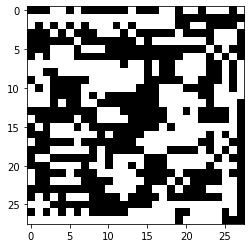

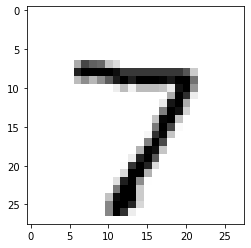

###


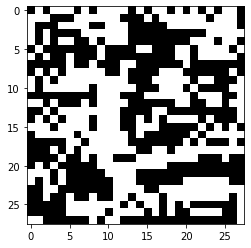

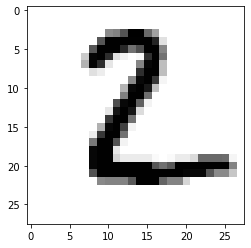

###


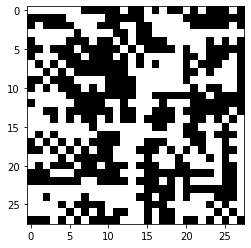

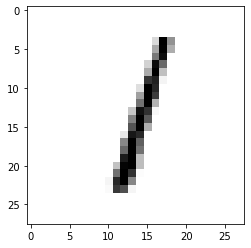

###


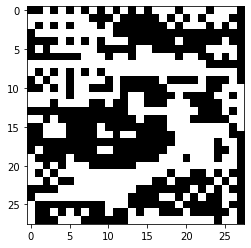

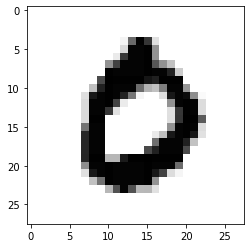

###


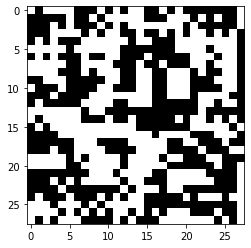

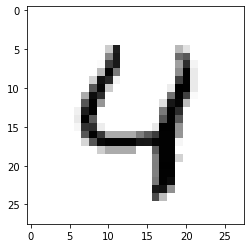

###


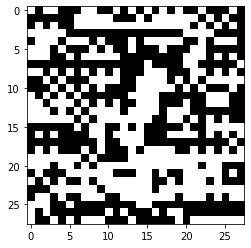

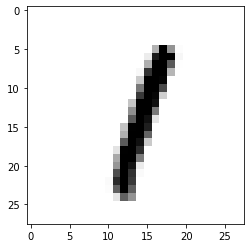

###


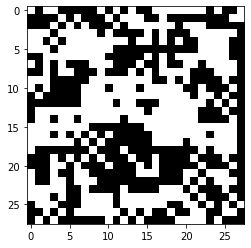

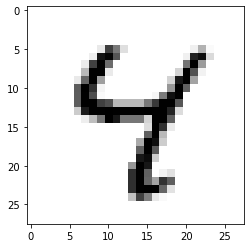

###


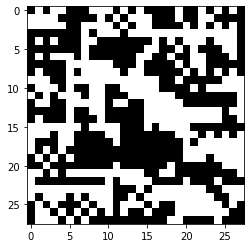

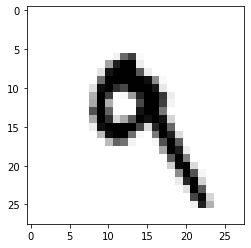

###


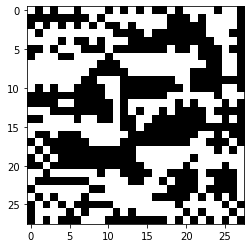

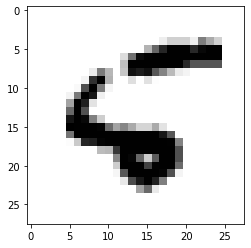

###


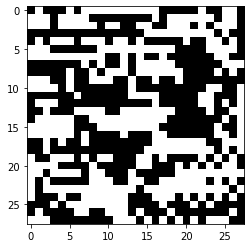

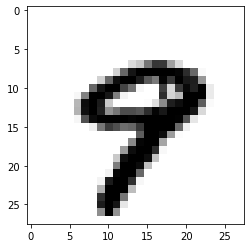

###


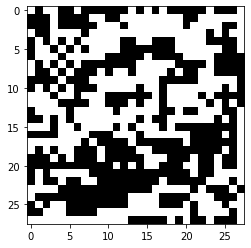

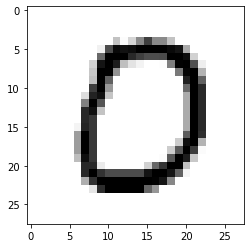

###


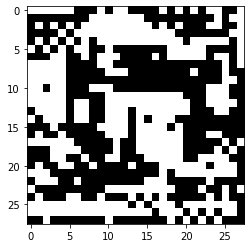

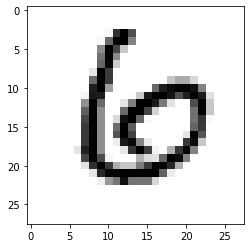

###


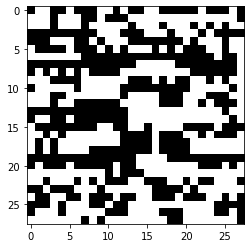

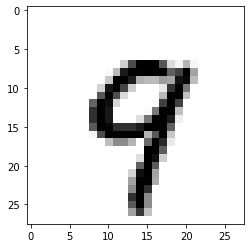

###


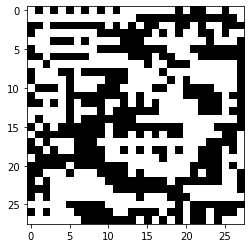

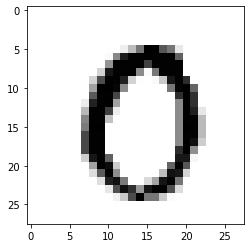

###


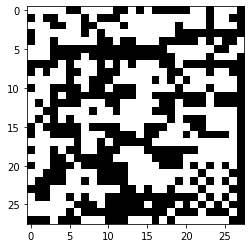

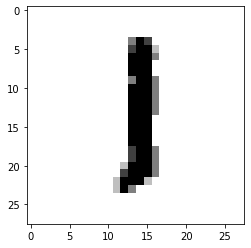

###


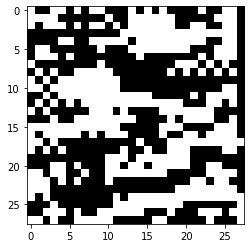

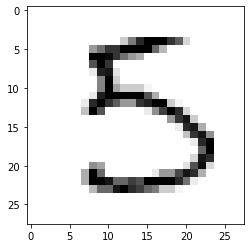

###


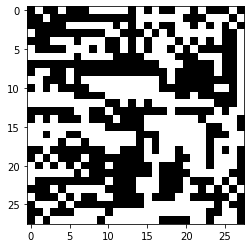

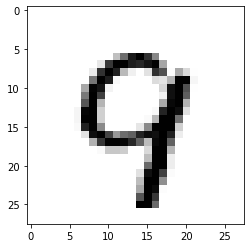

###


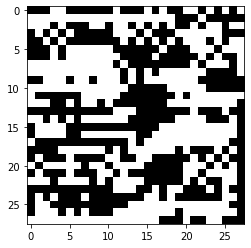

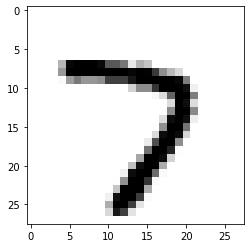

###


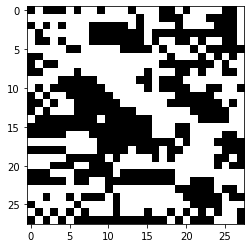

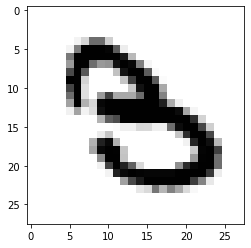

###


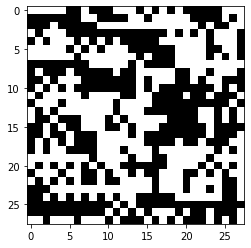

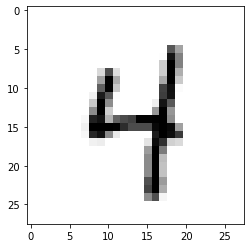

###


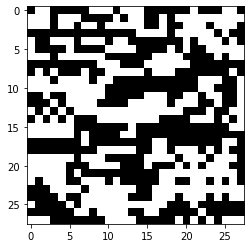

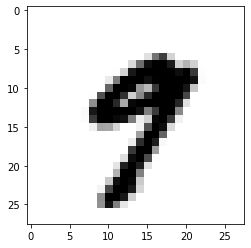

###


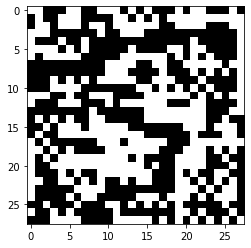

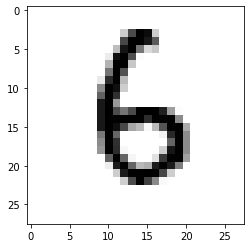

###


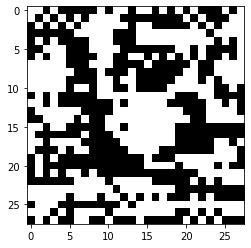

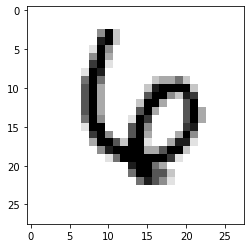

###


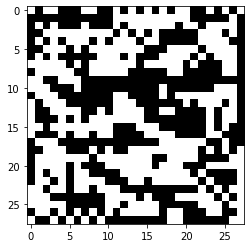

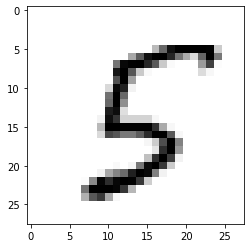

###


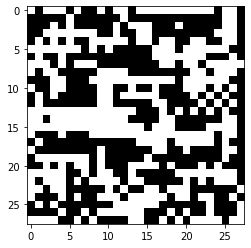

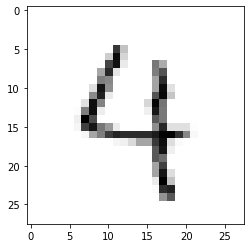

###


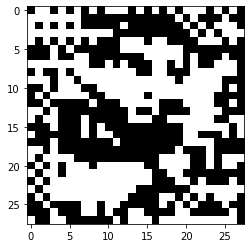

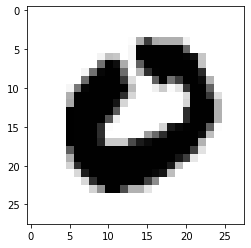

###


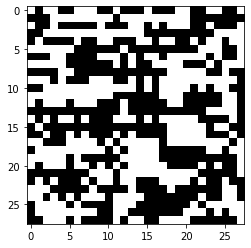

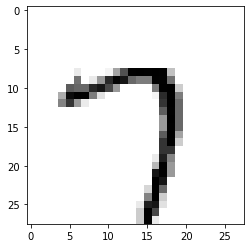

###


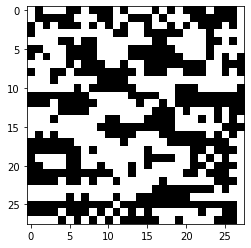

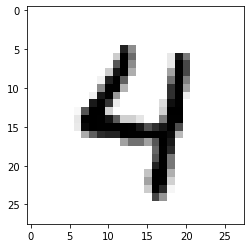

###


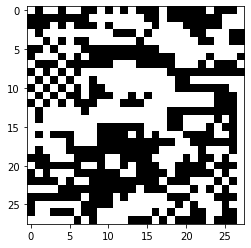

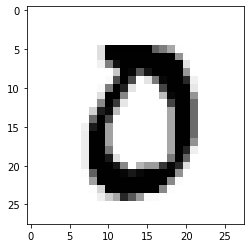

###


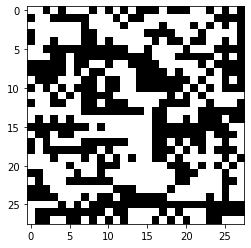

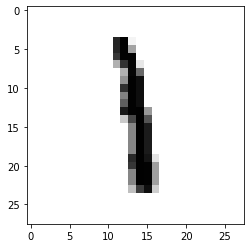

###


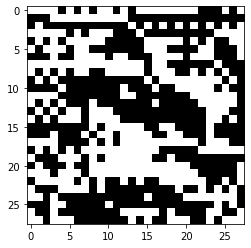

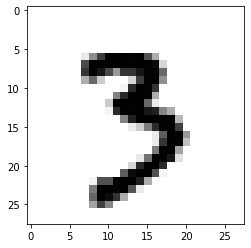

###


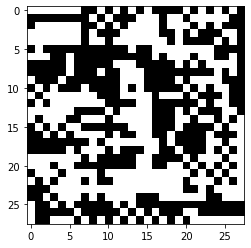

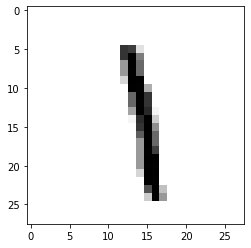

###


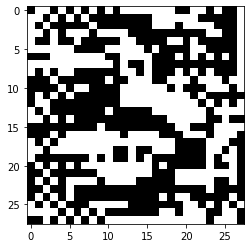

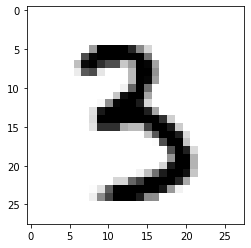

###


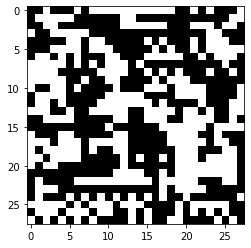

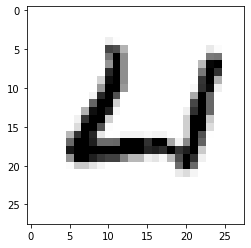

###


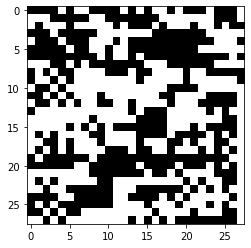

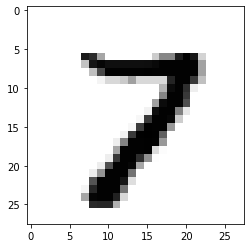

###


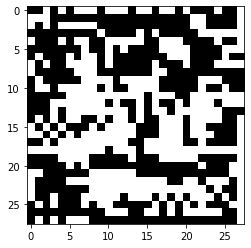

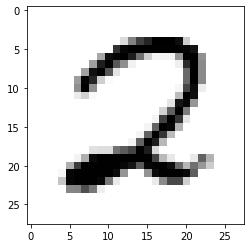

###


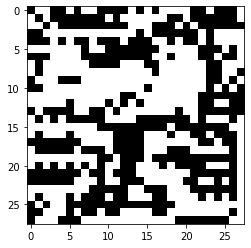

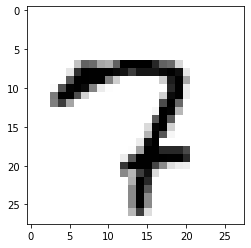

###


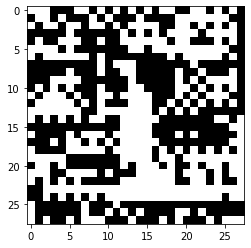

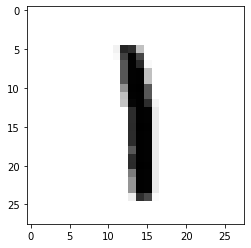

###


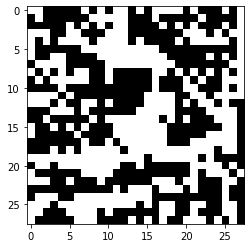

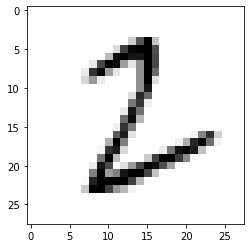

###


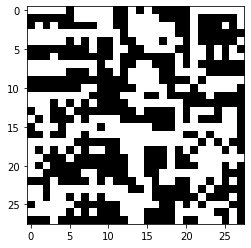

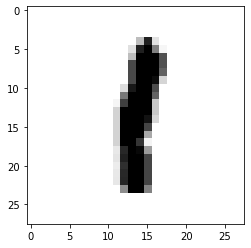

###


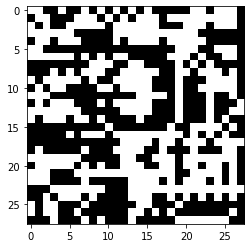

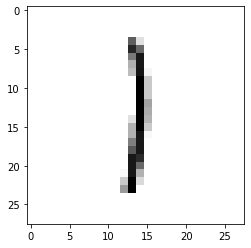

###


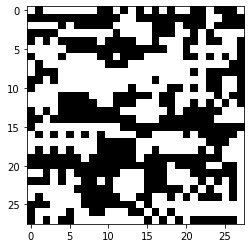

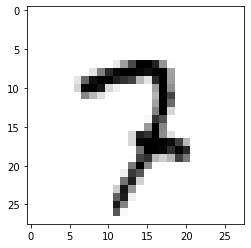

###


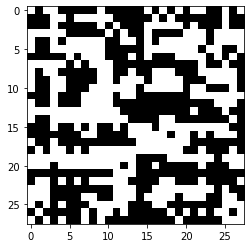

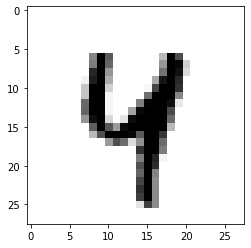

###


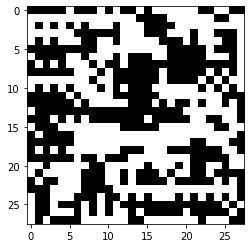

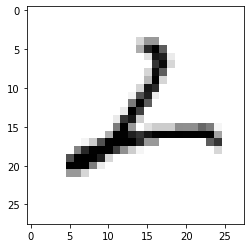

###


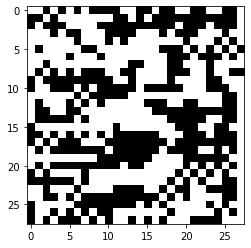

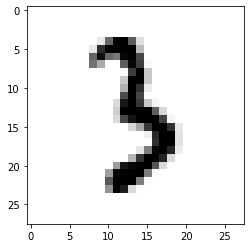

###


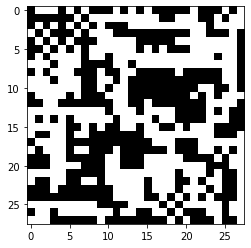

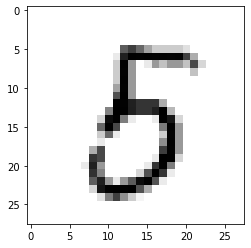

###


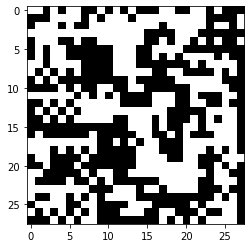

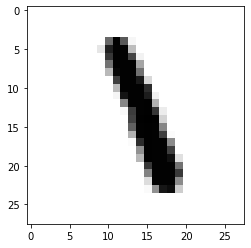

###


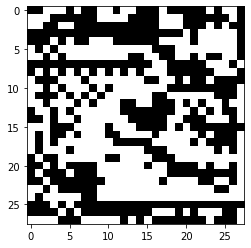

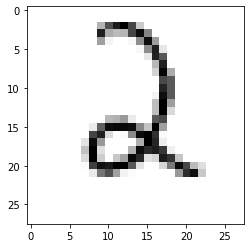

###


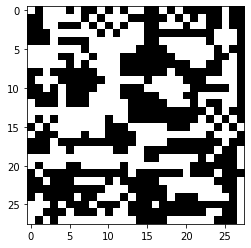

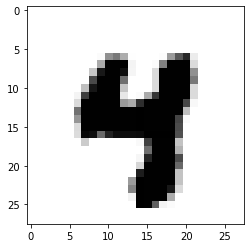

###


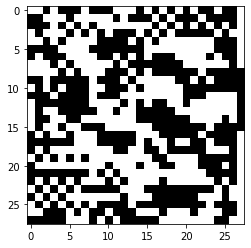

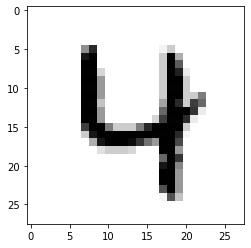

###


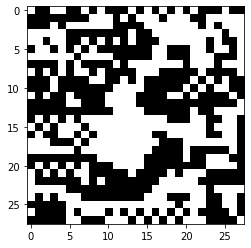

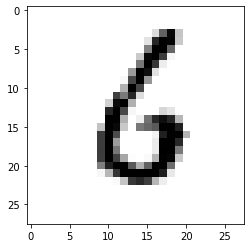

###


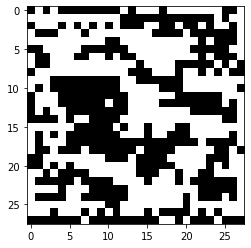

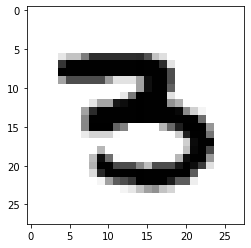

###


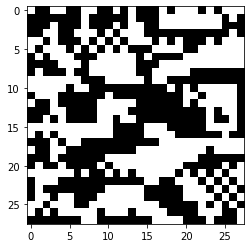

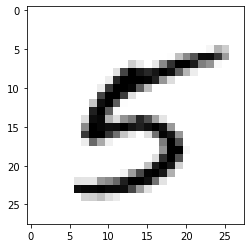

###


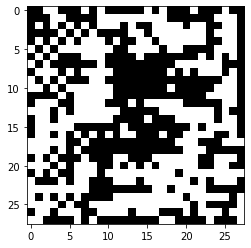

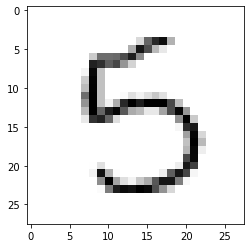

###


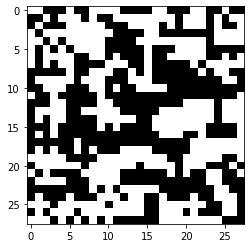

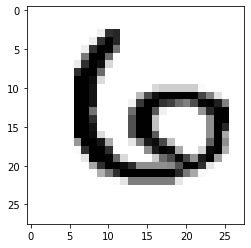

###


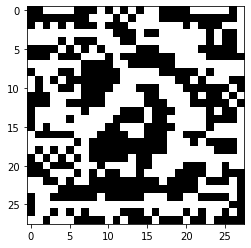

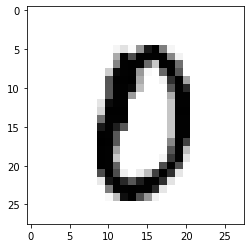

###


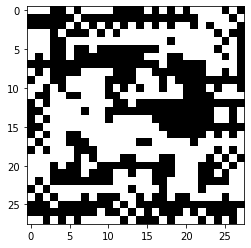

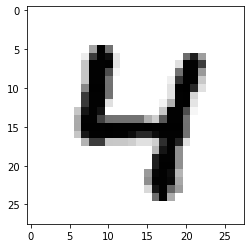

###


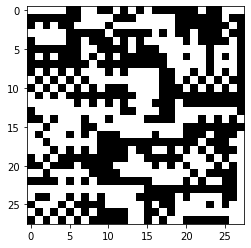

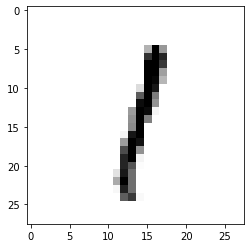

###


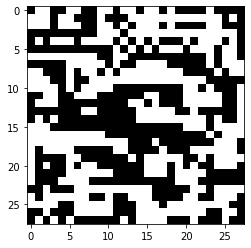

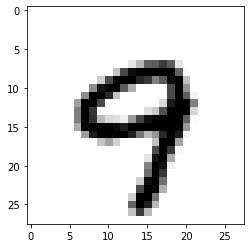

###


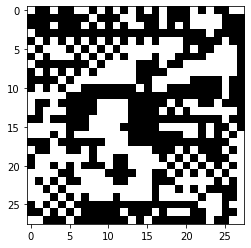

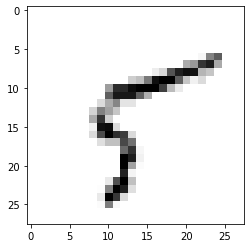

###


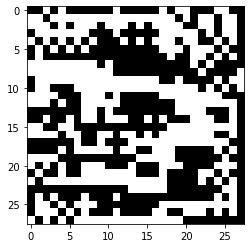

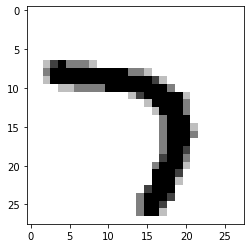

###


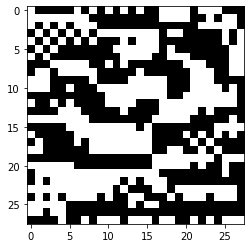

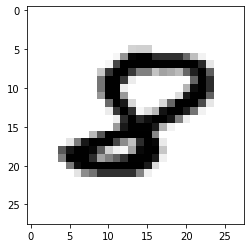

###


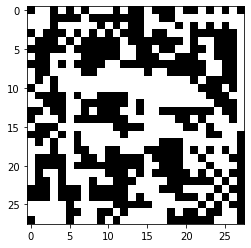

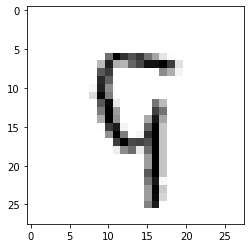

###


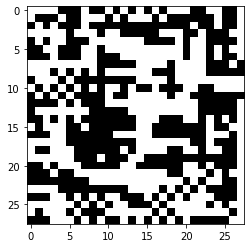

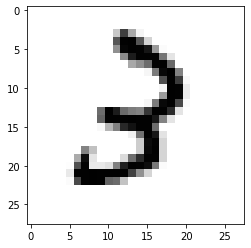

###


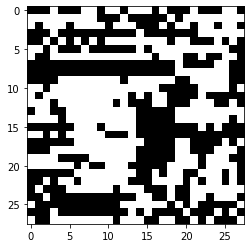

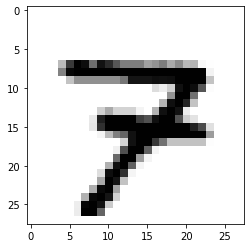

###


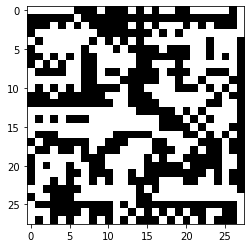

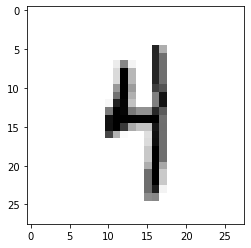

###


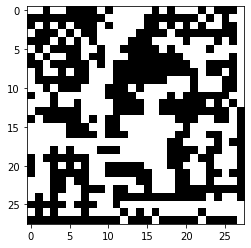

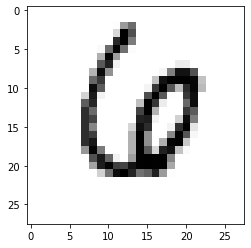

###


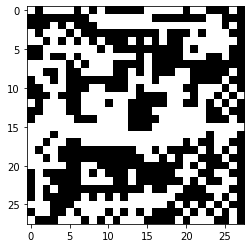

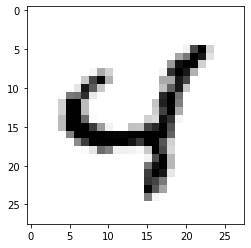

###


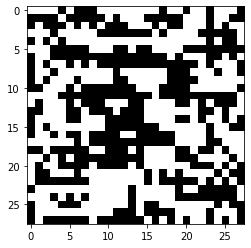

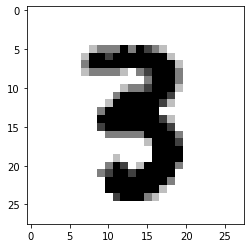

###


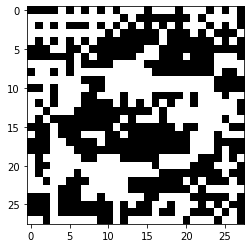

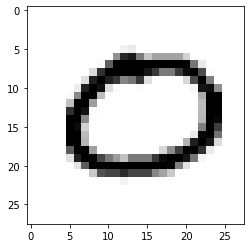

###


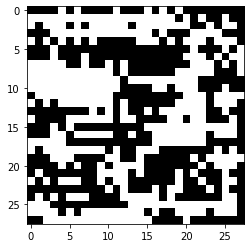

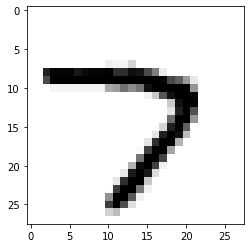

###


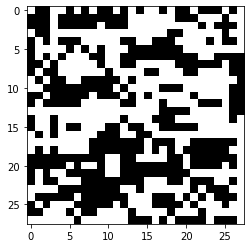

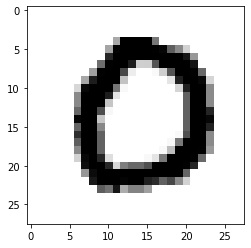

###


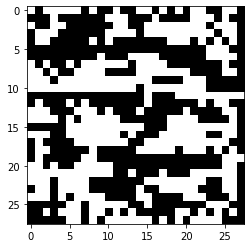

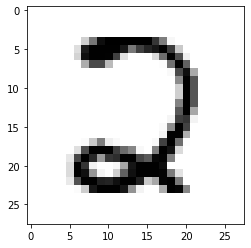

###


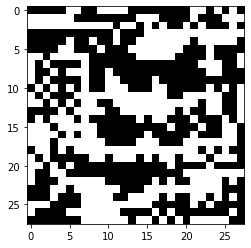

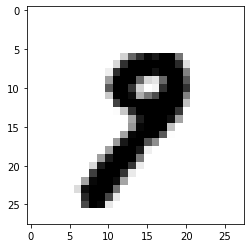

###


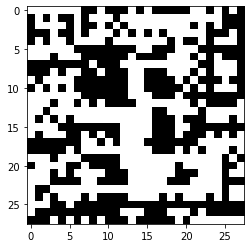

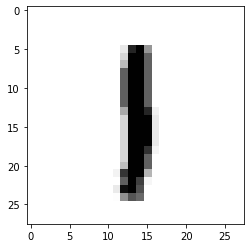

###


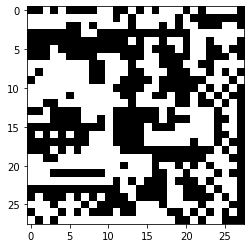

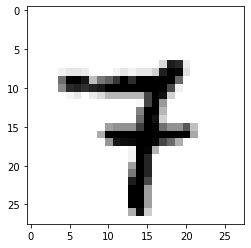

###


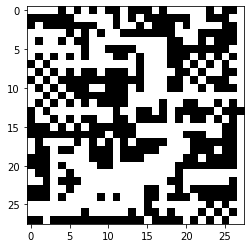

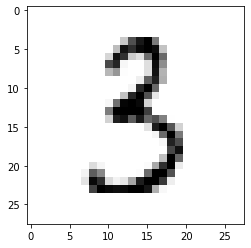

###


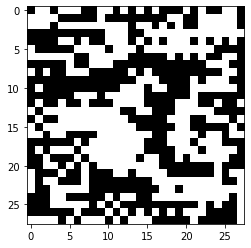

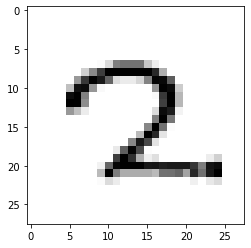

###


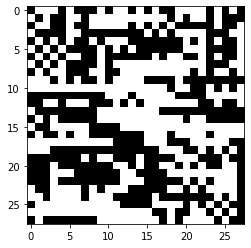

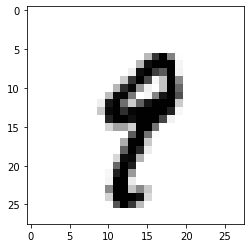

###


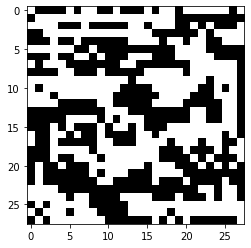

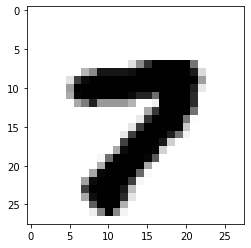

###


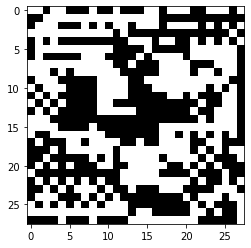

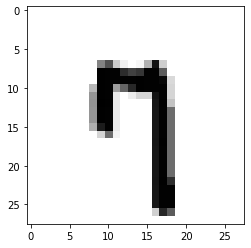

###


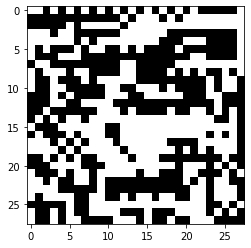

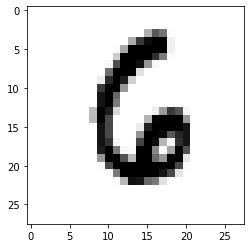

###


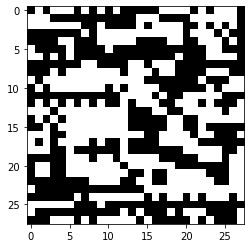

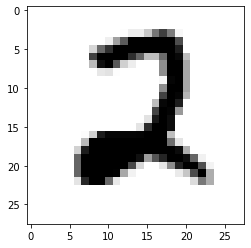

###


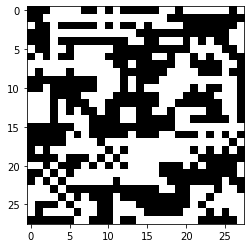

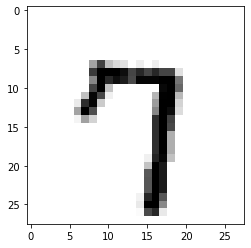

###


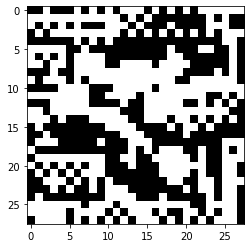

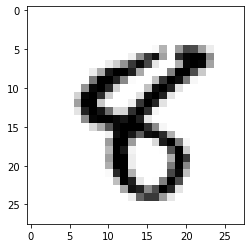

###


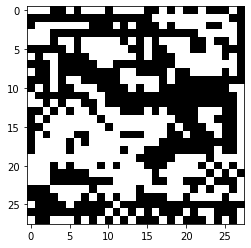

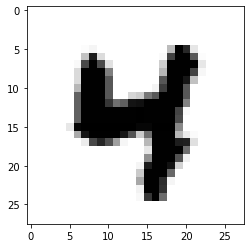

###


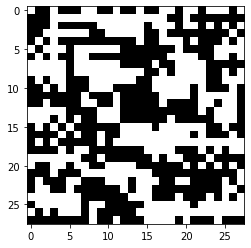

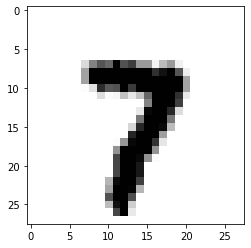

###


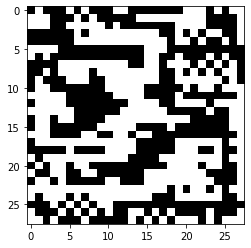

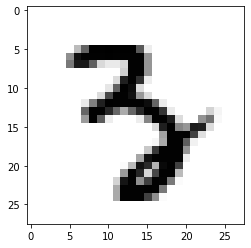

###


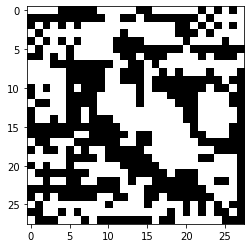

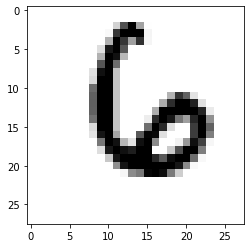

###


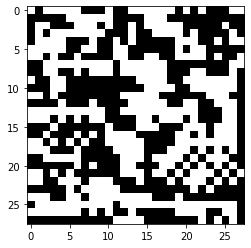

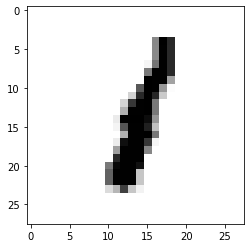

###


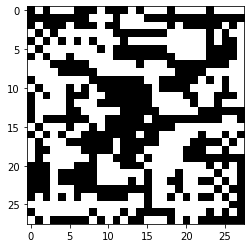

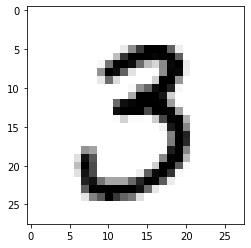

###


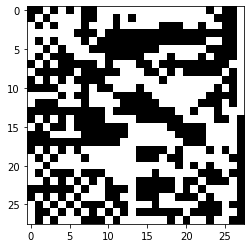

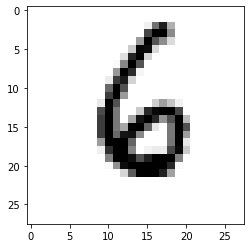

###


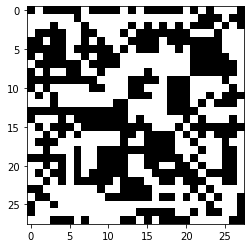

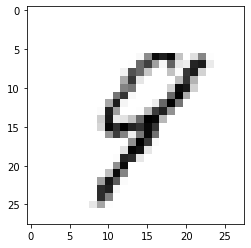

###


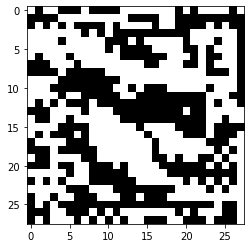

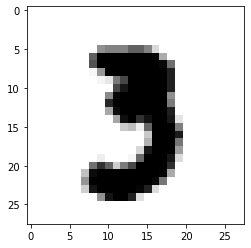

###


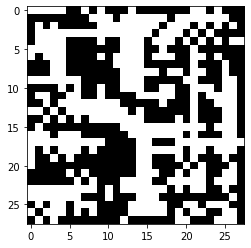

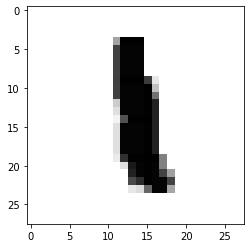

###


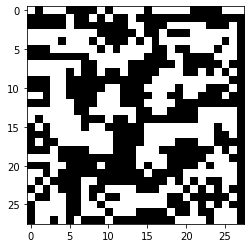

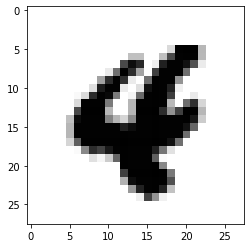

###


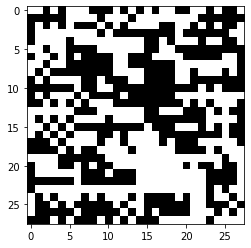

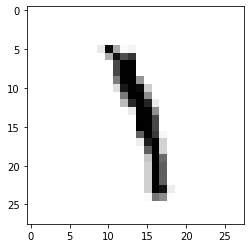

###


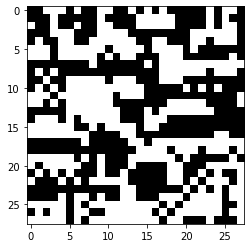

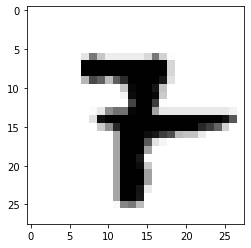

###


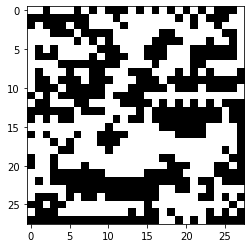

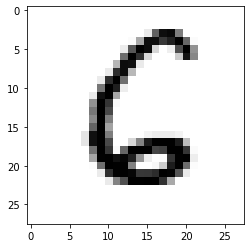

###


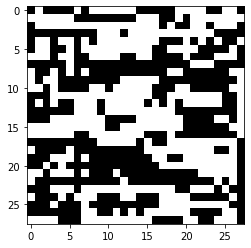

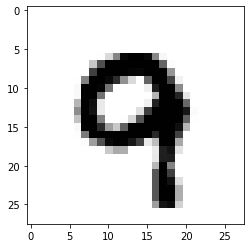

###


In [8]:
for i in range(100):
    plt.imshow(tf.squeeze(masks[i]), cmap = 'binary')
    plt.show()
    plt.imshow(validation_images[i], cmap = 'binary')
    plt.show()
    print('###')

In [9]:
tf.sing(0)

AttributeError: module 'tensorflow' has no attribute 'sing'